# Import Modules

In [0]:
import os
import cv2
from scipy import misc
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15.0, 12.0)
%matplotlib inline

# Connecting with Google Drive

Connecting with Google Drive with `google.colab` and changing the current directory to the **Face Recognition**.

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
os.chdir('/gdrive/My Drive/FaceRecognition')

# Loading Images

Loading 2 sample images: one with **multiple faces** on the same image and another one with only **one face** (using sunglasses).

In [4]:
os.listdir('models/HaarCascade')

['haarcascade_frontalface_default.xml']

In [5]:
os.listdir('data/images/')

['paula.jpeg',
 'pedro-milena.jpg',
 'Anthony_Hopkins_0001.jpg',
 'Anthony_Hopkins_0002.jpg']

In [0]:
multiple_path = '/gdrive/My Drive/FaceRecognition/data/images/pedro-milena.jpg'
single_path = '/gdrive/My Drive/FaceRecognition/data/images/paula.jpeg'

multiple_image = misc.imread(multiple_path)
single_image = misc.imread(single_path)

(-0.5, 1279.5, 959.5, -0.5)

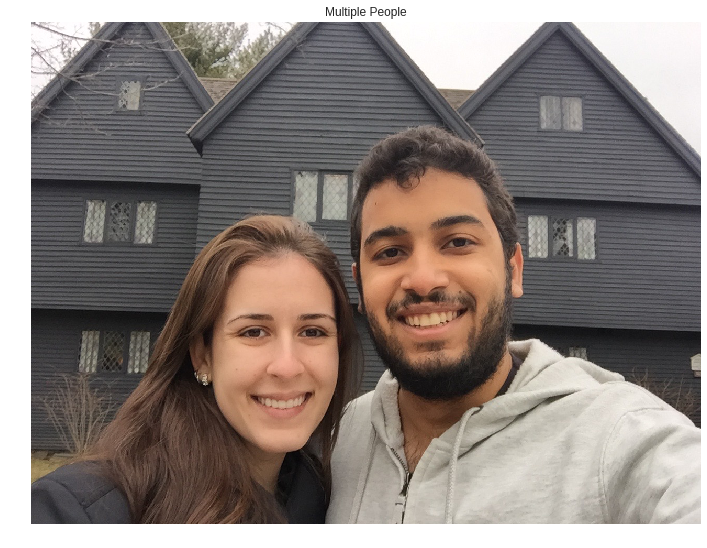

In [7]:
plt.figure(figsize=(12.0, 10.0))
plt.imshow(multiple_image)
plt.title('Multiple People')
plt.axis('off')

Text(0.5,1,'Single Person')

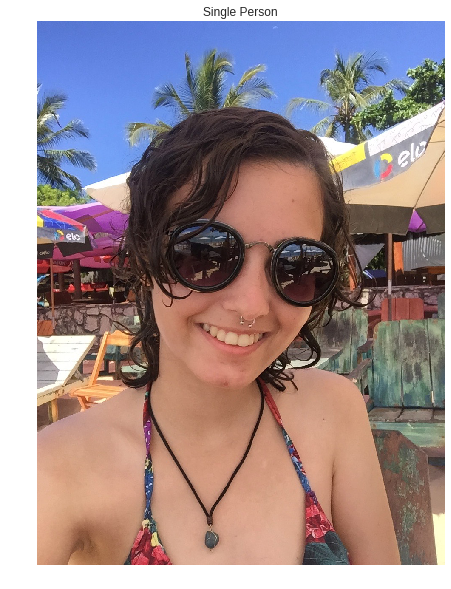

In [8]:
plt.figure(figsize=(12.0, 10.0))
plt.imshow(single_image)
plt.axis('off')
plt.title('Single Person')

# Detecting Faces

Using a pre-trained **Haar Cascade** model provided by OpenCV to detect faces on images.

In [0]:
# Loading the pre-trained model
face_cascade = cv2.CascadeClassifier('/gdrive/My Drive/FaceRecognition/models/HaarCascade/haarcascade_frontalface_default.xml')

In [0]:
# Reading the image, testing on the multiple people first
multiple_image = cv2.imread(multiple_path)
multiple_original = multiple_image.copy()
multiple_original = cv2.cvtColor(multiple_original, cv2.COLOR_BGR2RGB)
gray_multiple = cv2.cvtColor(multiple_image, cv2.COLOR_BGR2GRAY)

# Detecting faces
multiple_faces = face_cascade.detectMultiScale(gray_multiple, 1.3, 1)

In [0]:
for (x, y, w, h) in multiple_faces:
  cv2.rectangle(multiple_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  roi_gray = gray_multiple[y:y+h, x:x+w]
  roi_color = multiple_image[y:y+h, x:x+w]

Text(0.5,1,'Detecting Multiple Faces')

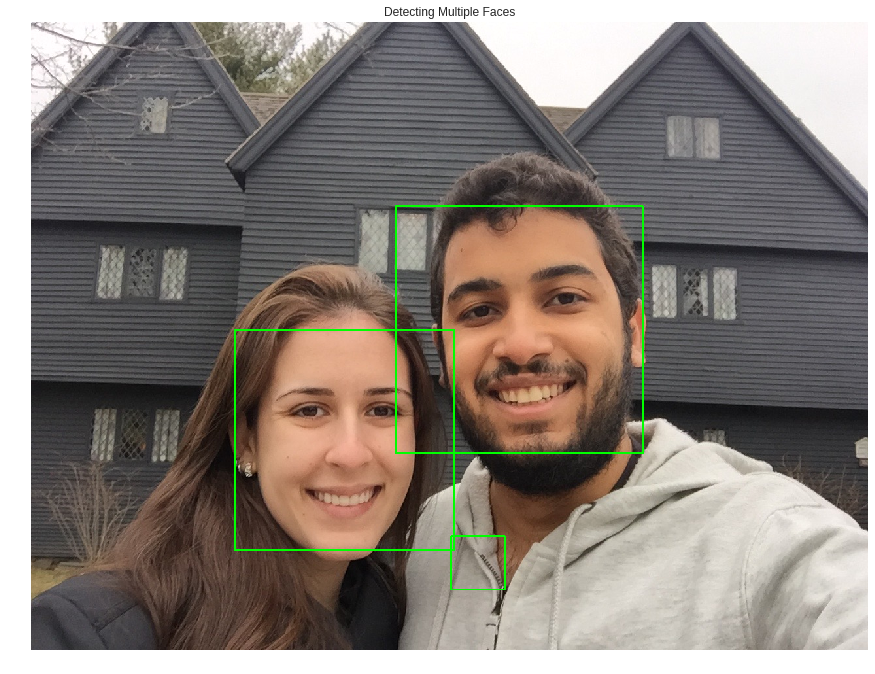

In [12]:
multiple_rgb = cv2.cvtColor(multiple_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15.0, 12.0))
plt.imshow(multiple_rgb)
plt.axis('off')
plt.title('Detecting Multiple Faces')

In [0]:
single_image = cv2.imread(single_path)
single_original = single_image.copy()
single_gray = cv2.cvtColor(single_image, cv2.COLOR_BGR2GRAY)

single_face = face_cascade.detectMultiScale(single_gray, 1.3, 1)

In [0]:
for (x, y, w, h) in single_face:
  cv2.rectangle(single_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  roi_gray = single_gray[y:y+h, x:x+w]
  roi_color = single_image[y:y+h, x:x+w]

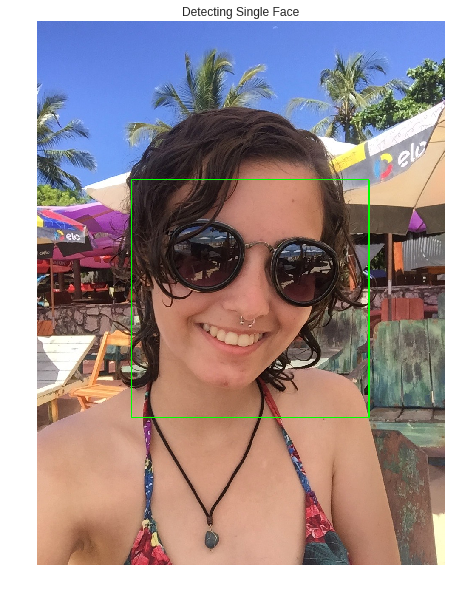

In [15]:
single_rgb = cv2.cvtColor(single_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12.0, 10.0))
plt.axis('off')
plt.title('Detecting Single Face')
plt.imshow(single_rgb)

# Cropping the image

Cropping the bounding box to generate 160x160 images.

In [26]:
multiple_faces.shape

(3, 4)

In [0]:
x, y, w, h = multiple_faces[0]
margin=40
cropped_image = multiple_original[y-margin:y+h+margin, x-margin:x+w+margin]

Text(0.5,1,'Face Detected')

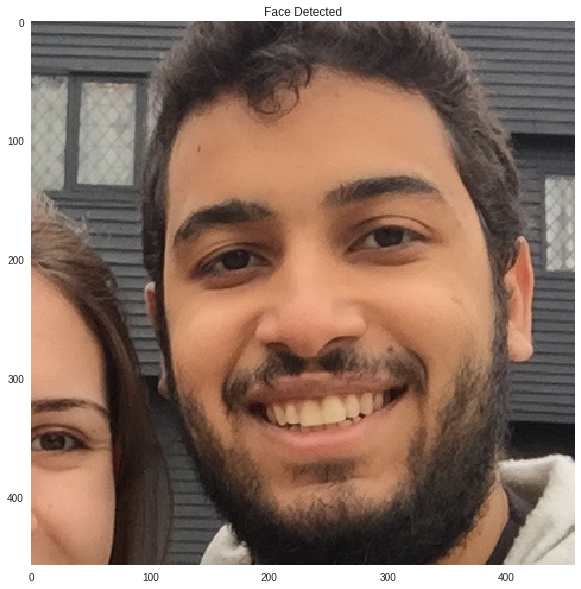

In [17]:
plt.figure(figsize=(12.0, 10.0))
plt.grid('off')
plt.imshow(cropped_image)
plt.title('Face Detected')

In [0]:
resized_image = cv2.resize(cropped_image, (160, 160))

Text(0.5,1,'Resized Face')

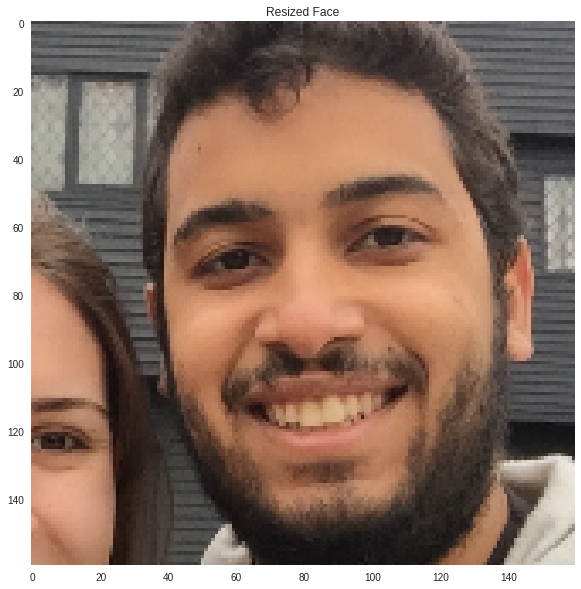

In [20]:
plt.figure(figsize=(12.0, 10.0))
plt.imshow(resized_image)
plt.grid('off')
plt.title('Resized Face')

In [21]:
resized_image.shape

(160, 160, 3)